# House Price prediction in  california
This project is a capstone project aimed at applying various data analysis techniques and machine learning algorithms, such as linear regression and random forests, to analyze data and evaluate their performance.
 We are going  to predict house price in california 
 our data source  have been download from Kaggle.
 source:https://www.kaggle.com/datasets/camnugent/california-housing-prices


In [2]:
# we start by importing  requiered libraries
import pandas as pd
import  numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data in a data fame for preprocessong
data=pd.read_csv("housing.csv")

Now we are going to explore the datse

In [5]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# We wlangle with missing values here
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


 Lets split our data for training and testing

In [9]:
 from sklearn.model_selection import train_test_split

In [10]:
# let drop the target variable
X=data.drop(['median_house_value'], axis=1)
Y=data['median_house_value']

In [11]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [13]:
train_data= X_train.join(Y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
12920,-121.31,38.66,26.0,1604.0,245.0,751.0,267.0,4.7381,INLAND,140500.0
14916,-117.04,32.63,26.0,2074.0,356.0,1228.0,335.0,4.1154,NEAR OCEAN,160200.0
1691,-122.24,38.01,16.0,2084.0,315.0,1154.0,307.0,6.0102,NEAR BAY,235600.0
13066,-121.32,38.54,13.0,4715.0,1090.0,2420.0,1059.0,2.9693,INLAND,104400.0
5832,-118.32,34.20,36.0,759.0,136.0,372.0,135.0,4.9886,<1H OCEAN,328900.0
...,...,...,...,...,...,...,...,...,...,...
20043,-119.00,36.07,20.0,1042.0,183.0,509.0,175.0,2.9815,INLAND,73000.0
8616,-118.38,33.87,23.0,2387.0,418.0,1008.0,415.0,5.8518,<1H OCEAN,337900.0
12654,-121.45,38.52,37.0,1477.0,321.0,888.0,312.0,2.5592,INLAND,70300.0
19694,-121.62,39.12,26.0,1405.0,204.0,627.0,215.0,4.2188,INLAND,94200.0


# somme basics plots

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

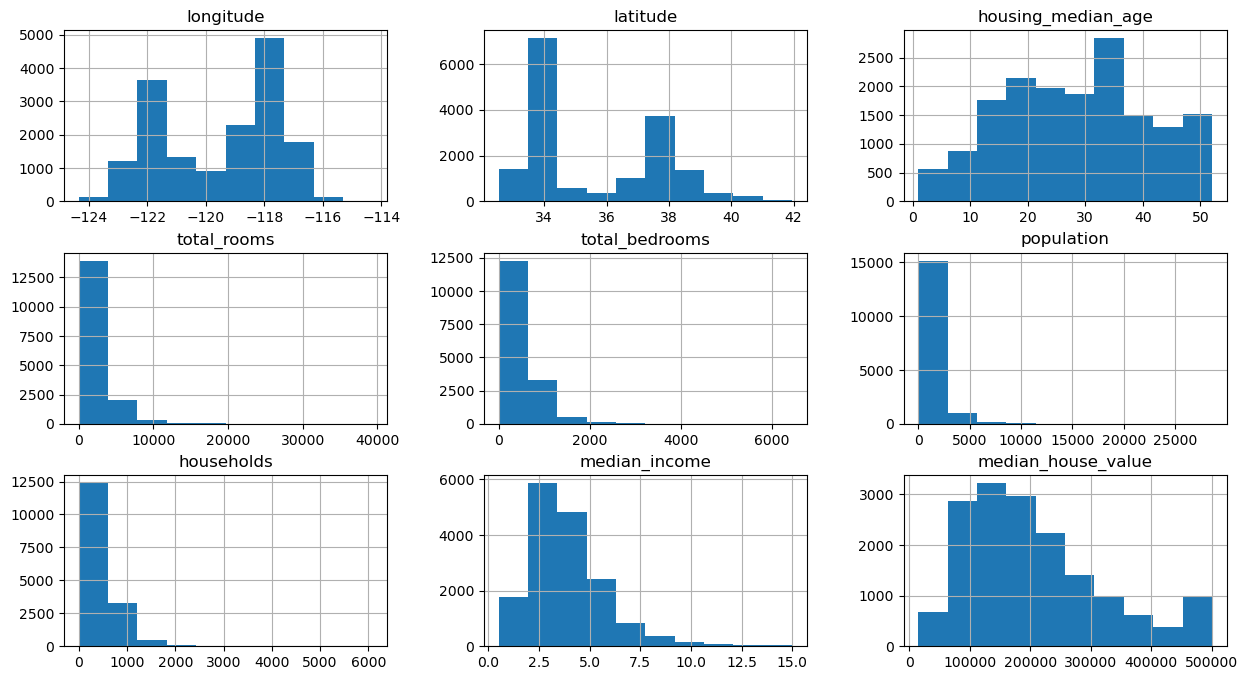

In [15]:
 #  the histogram
train_data.hist(figsize=(15,8))

<Axes: >

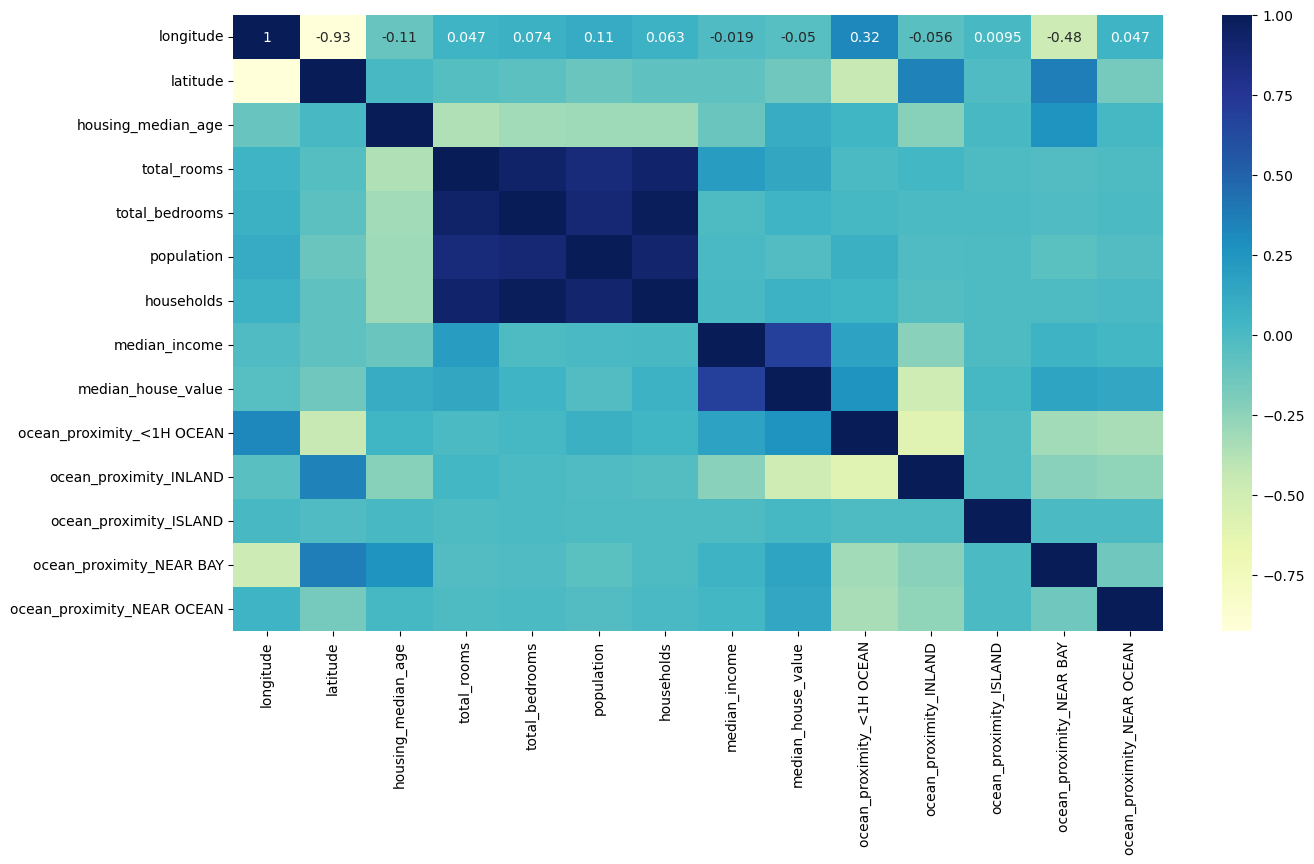

In [16]:
#let encode the catergorical collumns 'ocean_proximity' before  ploting the heatmap
train_data=pd.get_dummies(train_data,columns=['ocean_proximity'])

plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [17]:
# let  wangle the columns below
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

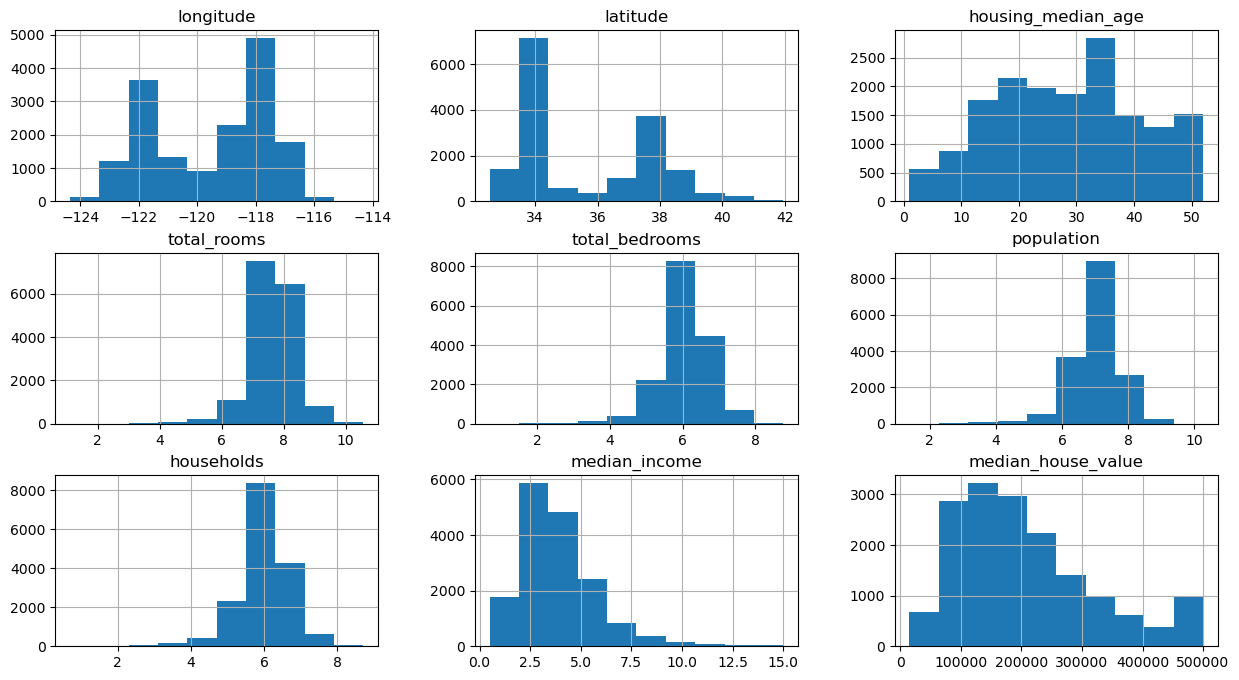

In [18]:
train_data.hist(figsize=(15,8))

<Axes: xlabel='latitude', ylabel='longitude'>

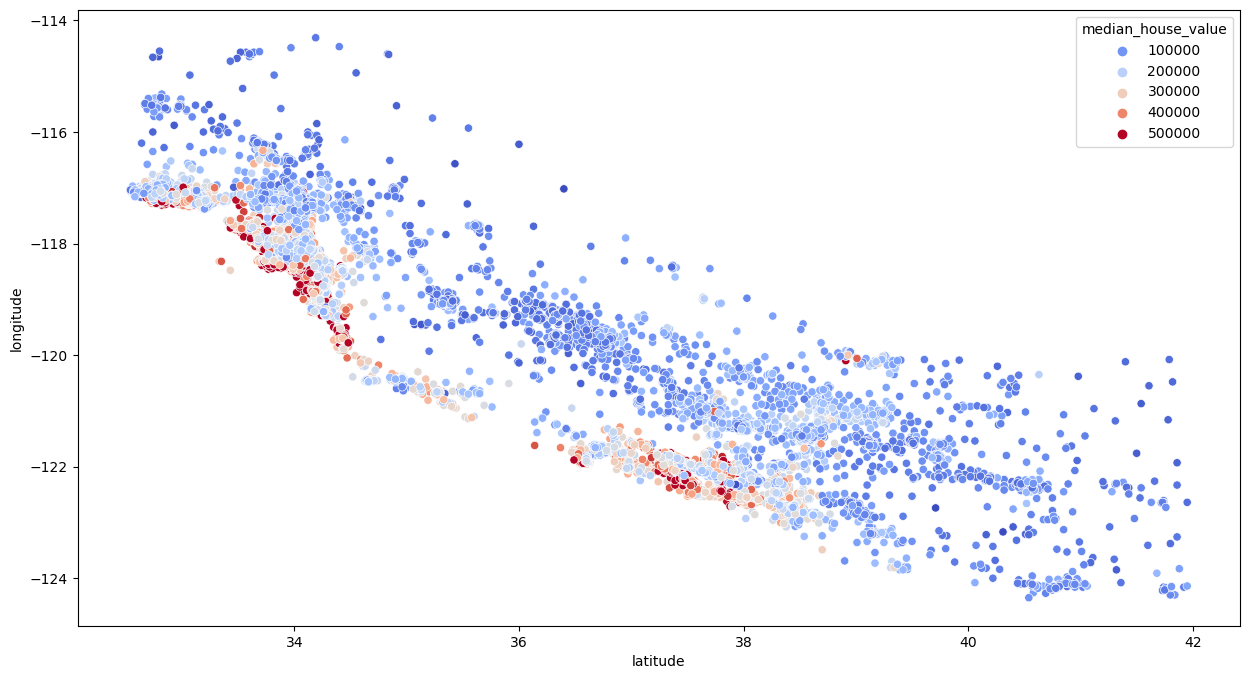

In [19]:
plt.figure(figsize=(15,8))

sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

In [20]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

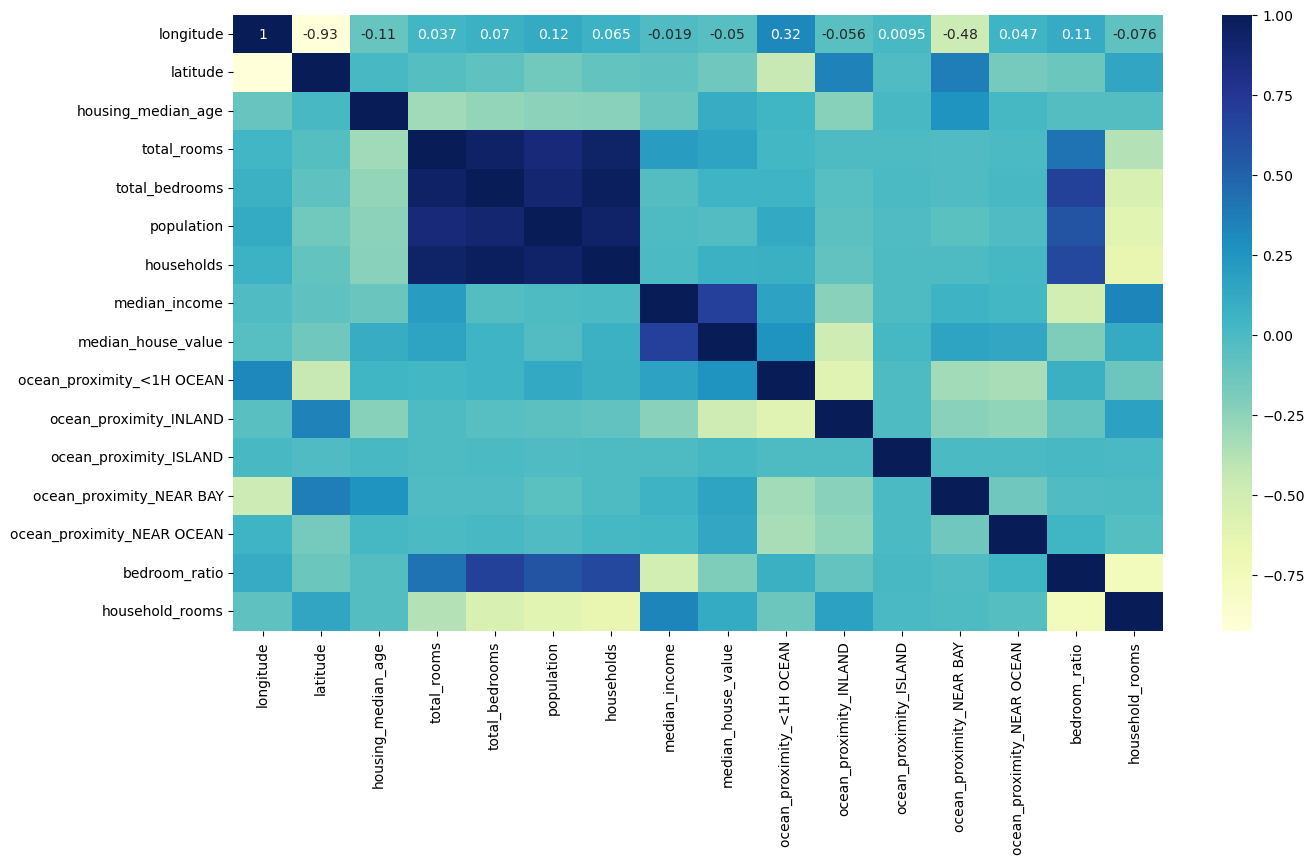

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [39]:
#  let train  machine linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train,Y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s=scaler.fit_transform(X_train) 

reg=LinearRegression()

reg.fit(X_train_s,Y_train)

LinearRegression()

In [41]:
X_test,Y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [42]:
X_test_s = scaler.transform(X_test)

In [44]:
reg.score(X_test_s,Y_test)

-0.5460309770363676

 As we can see the performing score is not too satisfactory so now. Let try Random forest model  to  evaluate the perfoming

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest =RandomForestRegressor()
forest.fit(X_train,Y_train)

RandomForestRegressor()

In [31]:
#score the score of the model
/
forest.score(X_test,Y_test)

0.8143273019140836

In [33]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor()

param_grid={
    "n_estimators": [2,10,30],
    "max_features": [2,4,6,8]
    
}
grid_search =GridSearchCV(forest,param_grid,cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(X_train_s,Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [2, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
best_forest= grid_search.best_estimator_

In [37]:
best_forest.score(X_test_s,Y_test)

0.8099706261172696

As we can see hear the second model, fit more than they  first one, it can't be use to predict the  house price hear.